# RHEED Metrics with Details

In [5]:
%load_ext autoreload
%autoreload 2
import glob
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/preprocessing/')
from Dataset import RHEED_spot_Dataset, RHEED_parameter_dataset
from Fit import RHEED_image_processer, Gaussian
# from Viz import show_images


def trim_axes(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

def show_images(images, labels=None, img_per_row=8, img_height=1, show_colorbar=False, 
                clim=3, scale_0_1=False, hist_bins=None, show_axis=False):
    
    '''
    Plots multiple images in grid.
    
    images
    labels: labels for every images;
    img_per_row: number of images to show per row;
    img_height: height of image in axes;
    show_colorbar: show colorbar;
    clim: int or list of int, value of standard deviation of colorbar range;
    scale_0_1: scale image to 0~1;
    hist_bins: number of bins for histogram;
    show_axis: show axis
    '''
    
    assert type(images) == list or type(images) == np.ndarray, "do not use torch.tensor for hist"
    if type(clim) == list:
        assert len(images) == len(clim), "length of clims is not matched with number of images"

    def scale(x):
        if x.min() < 0:
            return (x - x.min()) / (x.max() - x.min())
        else:
            return x/(x.max() - x.min())
    
    h = images[0].shape[1] // images[0].shape[0]*img_height + 1
    if not labels:
        labels = range(len(images))
        
    n = 1
    if hist_bins: n +=1
        
    fig, axes = plt.subplots(n*len(images)//img_per_row+1*int(len(images)%img_per_row>0), img_per_row, 
                             figsize=(16, n*h*len(images)//img_per_row+1))
    trim_axes(axes, len(images))

    for i, img in enumerate(images):
        
#         if torch.is_tensor(x_tensor):
#             if img.requires_grad: img = img.detach()
#             img = img.numpy()
            
        if scale_0_1: img = scale(img)
        
        if len(images) <= img_per_row and not hist_bins:
            index = i%img_per_row
        else:
            index = (i//img_per_row)*n, i%img_per_row

        axes[index].title.set_text(labels[i])
        im = axes[index].imshow(img)
        if show_colorbar:
            m, s = np.mean(img), np.std(img) 
            if type(clim) == list:
                im.set_clim(m-clim[i]*s, m+clim[i]*s) 
            elif type(clim) == int:
                im.set_clim(m-clim*s, m+clim*s) 

            fig.colorbar(im, ax=axes[index])
            
        if show_axis:
            axes[index].tick_params(axis="x",direction="in", top=True)
            axes[index].tick_params(axis="y",direction="in", right=True)
        else:
            axes[index].axis('off')

        if hist_bins:
            index_hist = (i//img_per_row)*n+1, i%img_per_row
            h = axes[index_hist].hist(img.flatten(), bins=hist_bins)
        
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
path = 'D:/RHEED/YY302_ScAlN_1.h5'
ds_spot = RHEED_spot_Dataset(path, sample_name='ScAlN')
ds_spot.data_info

Growth: ScAlN_deposition_1, Size of data: f(441352, 480, 640)
Growth: bottom_electrode_view_Az_neg23_Tilt_1p3, Size of data: f(373, 480, 640)


#### SrRuO3_deposition

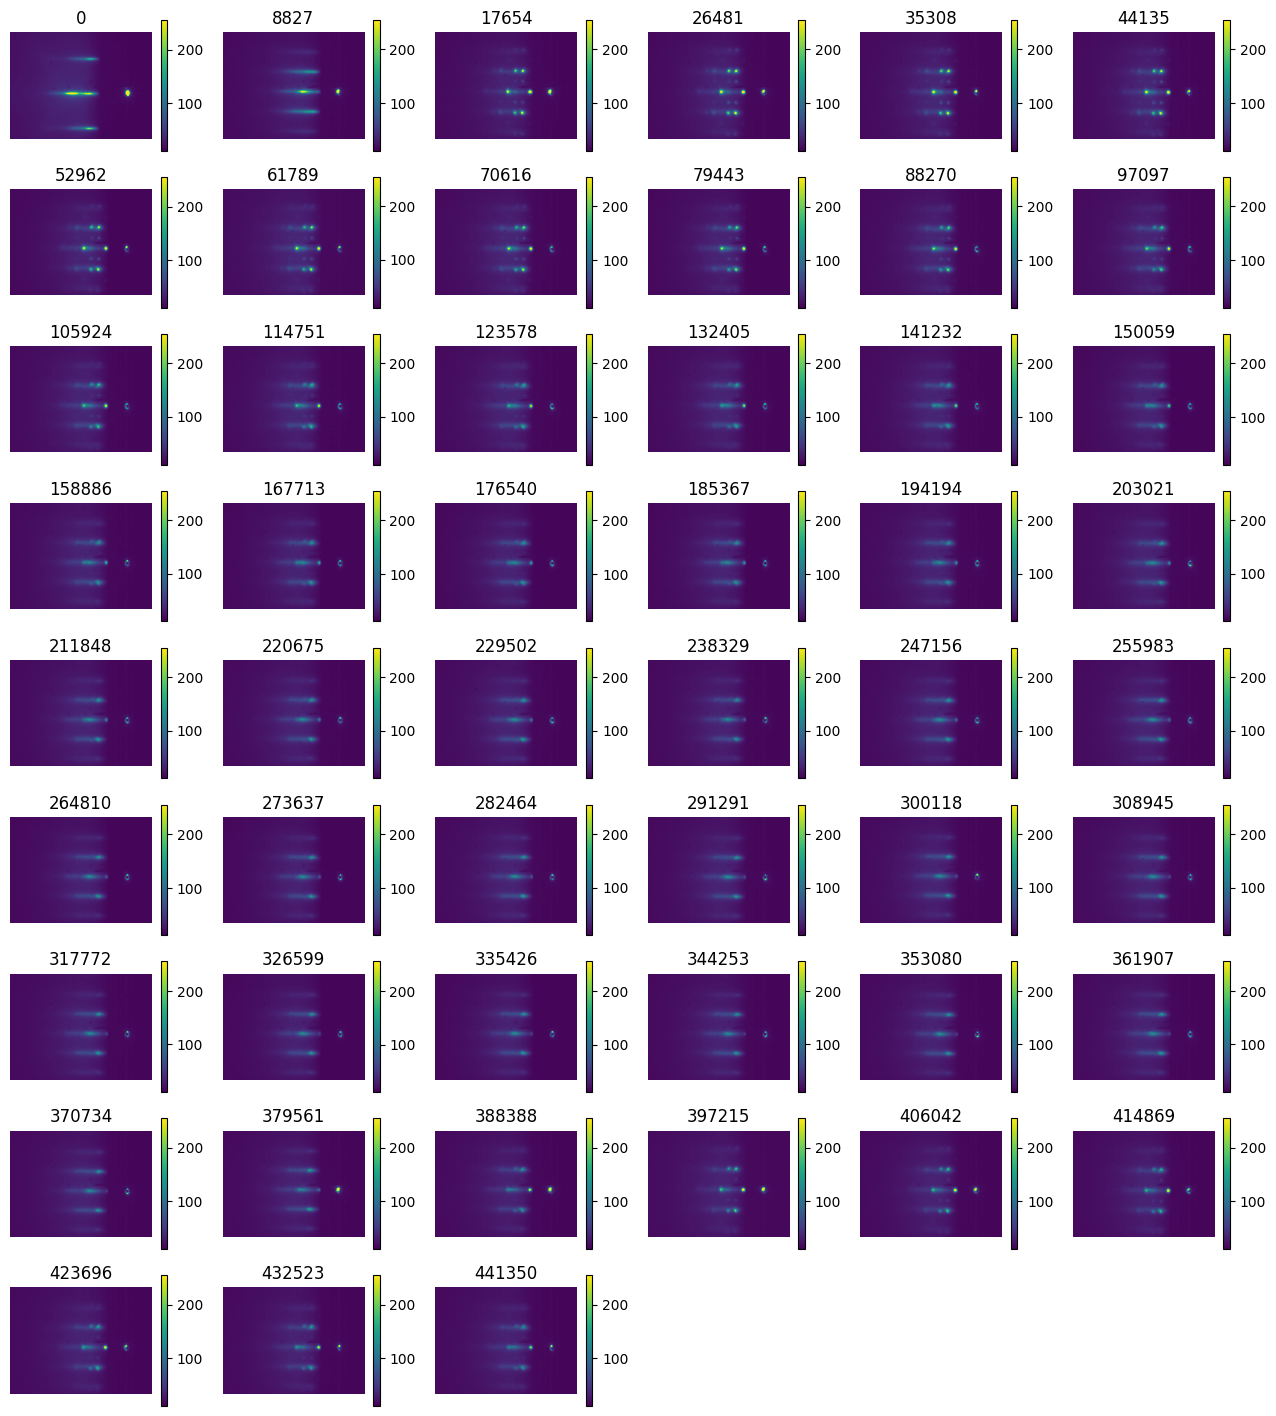

In [8]:
growth_name = 'ScAlN_deposition_1'
imgs, labels = [], []
for i in range(0, ds_spot.growth_dataset_length(growth_name), ds_spot.growth_dataset_length(growth_name)//50):
    imgs.append(ds_spot.growth_dataset(growth=growth_name, index=i))
    labels.append(i)
show_images(imgs, labels=labels, img_height=1, img_per_row=6, show_colorbar=True, clim=None)

In [3]:
growth_name = 'ScAlN_deposition_1'
ds_spot.viz_RHEED_spot(growth=growth_name, index=50000, figsize=(8,6), viz_mode='iteractive')

Fig. a: RHEED spot image for ScAlN_deposition_1 at index 50000.


<Figure size 800x600 with 0 Axes>

In [12]:
crop_dict_dict = {}

spot_1


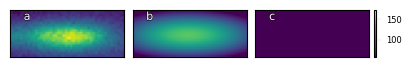

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for SrRuO3_deposition at index 50000.
The Gaussian fitted parameters are: img_sum=86665.00, img_max=172.00, img_mean=99.16,
img_rec_sum=84412.02, img_rec_max=142.40, img_rec_mean=96.58,
height=142.50, x=10.30, y=22.01, width_x=7.81, width_y_max=24.92.


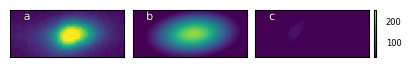

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for SrRuO3_deposition at index 2508080.
The Gaussian fitted parameters are: img_sum=70573.00, img_max=255.00, img_mean=80.75,
img_rec_sum=62521.30, img_rec_max=219.67, img_rec_mean=71.53,
height=220.38, x=9.88, y=24.39, width_x=5.22, width_y_max=10.11.
spot_2


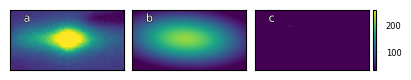

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for SrRuO3_deposition at index 50000.
The Gaussian fitted parameters are: img_sum=151705.00, img_max=255.00, img_mean=110.17,
img_rec_sum=143636.36, img_rec_max=219.15, img_rec_mean=104.31,
height=219.49, x=13.13, y=23.98, width_x=7.73, width_y_max=18.11.


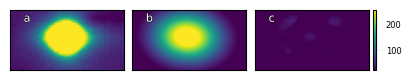

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for SrRuO3_deposition at index 2508080.
The Gaussian fitted parameters are: img_sum=139235.00, img_max=255.00, img_mean=101.11,
img_rec_sum=127788.88, img_rec_max=293.08, img_rec_mean=92.80,
height=293.21, x=12.29, y=24.80, width_x=7.66, width_y_max=10.46.
spot_3


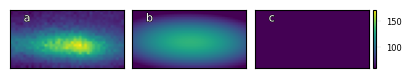

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for SrRuO3_deposition at index 50000.
The Gaussian fitted parameters are: img_sum=88827.00, img_max=172.00, img_mean=93.90,
img_rec_sum=86905.75, img_rec_max=132.55, img_rec_mean=91.87,
height=132.60, x=12.39, y=22.07, width_x=9.06, width_y_max=25.52.


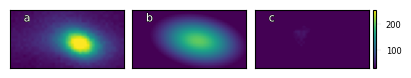

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for SrRuO3_deposition at index 2508080.
The Gaussian fitted parameters are: img_sum=69438.00, img_max=255.00, img_mean=73.40,
img_rec_sum=60299.91, img_rec_max=201.16, img_rec_mean=63.74,
height=201.80, x=12.07, y=25.97, width_x=5.56, width_y_max=9.97.


In [13]:
growth_name = 'SrRuO3_deposition'
# ds_spot.viz_RHEED_spot(growth=growth_name, index=700000, figsize=(8,6), viz_mode='iteractive')

crop_dict = {'spot_1': {'x_start':314, 'y_start':329, 'x_end':360, 'y_end':348}, 
             'spot_2': {'x_start':288, 'y_start':385, 'x_end':339, 'y_end':412}, 
             'spot_3': {'x_start':312, 'y_start':444, 'x_end':355, 'y_end':466}}
start_index, end_index = 50000, 2508080
fit_function = Gaussian().recreate_gaussian
processor = RHEED_image_processer(ds_spot, crop_dict, fit_function)
for spot in crop_dict.keys():
    print(spot)
    img, img_rec, parameters = processor.visualize(growth=growth_name, spot=spot, frame=start_index, figsize=(4,8))
    img, img_rec, parameters = processor.visualize(growth=growth_name, spot=spot, frame=end_index, figsize=(4,8))
crop_dict_dict[growth_name] = crop_dict

## generation

In [14]:
parameters_file_path = 'F:/YG063_RHEED_gaussian_fit_parameters.h5'

for growth_name in crop_dict_dict.keys():
    print(growth_name)
    crop_dict = crop_dict_dict[growth_name]
    fit_function = Gaussian().recreate_gaussian
    processor = RHEED_image_processer(ds_spot, crop_dict, fit_function)
    processor.write_h5_file(parameters_file_path, [growth_name], replace=False, num_workers=12, process_chunk_size=50000)

SrRuO3_deposition
SrRuO3_deposition:
  spot_1 generation started:
    0 - 50000 ...
    50000 - 100000 ...
    100000 - 150000 ...
    150000 - 200000 ...
    200000 - 250000 ...
    250000 - 300000 ...
    300000 - 350000 ...
    350000 - 400000 ...
    400000 - 450000 ...
    450000 - 500000 ...
    500000 - 550000 ...
    550000 - 600000 ...
    600000 - 650000 ...
    650000 - 700000 ...
    700000 - 750000 ...
    750000 - 800000 ...
    800000 - 850000 ...
    850000 - 900000 ...
    900000 - 950000 ...
    950000 - 1000000 ...
    1000000 - 1050000 ...
    1050000 - 1100000 ...
    1100000 - 1150000 ...
    1150000 - 1200000 ...
    1200000 - 1250000 ...
    1250000 - 1300000 ...
    1300000 - 1350000 ...
    1350000 - 1400000 ...
    1400000 - 1450000 ...
    1450000 - 1500000 ...
    1500000 - 1550000 ...
    1550000 - 1600000 ...
    1600000 - 1650000 ...
    1650000 - 1700000 ...
    1700000 - 1750000 ...
    1750000 - 1800000 ...
    1800000 - 1850000 ...
    1850000 - 1900

SrRuO3_deposition


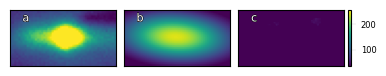

Fig. a: RHEED spot image, b: reconstructed RHEED spot image, c: difference between original and reconstructed image for SrRuO3_deposition at index 15000.
img_sum=172392.00, img_max=255.00, img_mean=125.19
img_rec_sum=164225.48, img_rec_max=244.33, img_rec_mean=119.26
height=244.66, x=13.15, y=24.98, width_x=7.88, width_y_max=18.51


I:\RHEED_data\RHEED_data_collect\notebooks\SRO_STO_Drexel_TSST\../../src\Dataset.py:506: UserWarning:

FixedFormatter should only be used together with FixedLocator



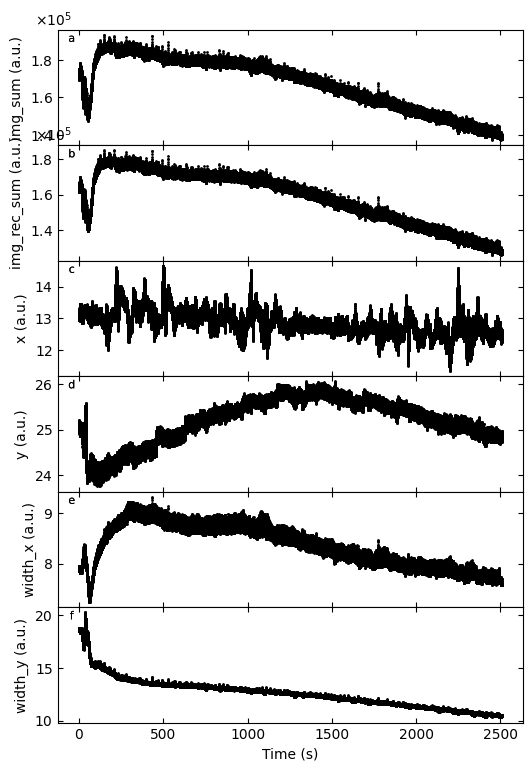

Gaussian fitted parameters in time: Fig. a: sum of original image, b: sum of reconstructed image, c: spot center in spot x coordinate, d: spot center in y coordinate, e: spot width in x coordinate, f: spot width in y coordinate.


In [15]:
parameters_file_path = 'F:/YG063_RHEED_gaussian_fit_parameters.h5'
ds_para = RHEED_parameter_dataset(parameters_file_path, camera_freq=1000, sample_name='YG063')

for growth_name in crop_dict_dict.keys():
    print(growth_name)
    ds_para.viz_RHEED_parameter(growth=growth_name, spot='spot_2', index=15000)
    ds_para.viz_RHEED_parameter_trend([growth_name], spot='spot_2', head_tail=(100,300))

In [ ]:
import tarfile
import gzip
import os

def compress_folder(source_dir, output_filename):
    with tarfile.open(output_filename, "w:gz", compresslevel=9) as tar:
        tar.add(source_dir, arcname=os.path.basename(source_dir))

# Usage
compress_folder("I:/RHEED_data/RHEED_Berkerley_072023", "RHEED_Berkerley_072023_backup.tar.gz")

In [ ]:
compress_folder("F:/YG063", "YG063_RHEED_container.tar.gz")

In [2]:
import sys
sys.path.append('../../src/')
from Dataset import datafed_upload
datafed_upload('D:/RHEED/YG063_RHEED_gaussian_fit_parameters.h5', 'c/525610495', wait=True)